# Loans in US Exploration
## by Ivan Ramos

### Table of contents

1. [Introduction](#intro_section)<br />
    1.1 [Structure of dataset](#structure_section)<br />
    1.2 [Features of interest](#features_section)
2. [Preliminary wrangling](#wrangling_section)
3. [Univariate exploration](#univariate_section)<br />
    3.1 [Conclusions](#univariate_section_conclusions)<br />
4. [Bivariate exploration](#bivariate_section)<br />
    4.1 [Conclusions](#bivariate_section_conclusions)<br />
5. [Multivariate exploration](#multivariate_section)<br />
    5.1 [Conclusions](#multivariate_section_conclusions)<br />

<a id="intro_section"></a>

## Introduction

Loan Data from Prosper is a dataset that contains 113,937 entries of loans in a period between fall of 2005 and first quarter 2014 across the US. Each entry contains interesting variables including  loan amount, insterest and APR rates, rating given by the Prosper financial agency,  current loan status, borrower income among others.

In [108]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

%matplotlib inline

In [109]:
loans_original = pd.read_csv('prosperLoanData.csv')
# Total Observations 113937
loans_original.shape

(113937, 81)

In [110]:
loans_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [111]:
pd.set_option('display.max_columns', None)
loans_original.sample(4)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
99063,70D035859817988649DD2FD,856325,2013-07-31 07:47:20.840000000,NaN,60,Current,NaN,0.19364,0.1699,0.1599,0.1512,0.0549,0.0963,5.0,B,3.0,2,MN,Nurse (RN),Employed,26.0,True,False,NaN,2013-07-31 08:43:28,700.0,719.0,2000-07-31 00:00:00,22.0,22.0,36.0,17,442.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,10509.0,0.56,7221.0,29.0,1.00,3.0,0.29,"$75,000-99,999",True,7083.333333,EEE23690118908289CCFBE0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,7,98405,15000,2013-08-08 00:00:00,Q3 2013,280435845401077458BE522,372.71,2229.2778,986.32,1242.9578,-73.57,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
104431,84863382037503284FEE65D,100347,2007-02-16 08:12:49.577000000,AA,36,Defaulted,2009-05-02 00:00:00,0.12580,0.1188,0.1138,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Other,Full-time,16.0,False,False,NaN,2007-02-15 08:10:38.280000000,760.0,779.0,1985-07-28 00:00:00,4.0,3.0,24.0,4,0.0,2.0,2.0,3.0,3045.0,0.0,0.0,0.0,0.0,0.00,0.0,21.0,0.85,1.0,0.16,"$100,000+",True,10083.333333,6474338169166785680C4A2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,910,0.0,84,8001,25000,2007-03-01 00:00:00,Q1 2007,E4D73381152534455D701FF,828.93,17884.6600,13440.28,4444.3800,-160.87,-1494.78,11559.72,10121.32,2761.6,1.0,0,0,0.0,519
84885,D47E34828842113905249DB,457403,2010-05-07 10:21:33.057000000,NaN,36,Completed,2012-12-17 00:00:00,0.37453,0.3500,0.3400,0.1299,0.1900,0.1299,1.0,HR,4.0,1,VT,Professional,Full-time,32.0,True,False,NaN,2010-04-16 06:56:21,620.0,639.0,1998-04-13 00:00:00,8.0,7.0,25.0,5,157.0,0.0,7.0,0.0,0.0,7.0,1.0,0.0,3783.0,0.94,232.0,23.0,0.78,0.0,0.09,"$50,000-74,999",True,6008.333333,90523587013556162D605B9,2.0,62.0,60.0,2.0,0.0,4000.0,571.97,60.0,0,NaN,46,42518,5600,2010-05-17 00:00:00,Q2 2010,A06E337099095439748A6A9,253.32,9159.7100,5600.00,3559.7100,-87.06,0.00,0.00,0.00,0.0,1.0,1,0,0.0,56
88422,5B8235860567072822319D2,853670,2013-07-28 11:03:23.713000000,NaN,60,Current,NaN,0.31293,0.2862,0.2762,0.2519,0.1275,0.1244,2.0,E,6.0,1,MI,Administrative Assistant,Employed,64.0,False,False,NaN,2013-07-28 11:03:11,620.0,639.0,2007-04-22 00:00:00,4.0,3.0,18.0,2,71.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3256.0,0.98,44.0,6.0,1.00,0.0,0.08,"$25,000-49,999",True,2420.916667,F51636901498797880191BC,4.0,62.0,62.0,0.0,0.0,6000.0,1811.62,-36.0,0,NaN,7,97915,2000,2013-08-02 00:00:00,Q3 2013,D0CF34203382919484CD8F9,63.02,504.1600,193.21,310.9500,-6.43,0.00,0.00,0.00,0.0,1.0,0,0,0.0,10


In [112]:
# Let´s see if there are any duplicates on the dataset
loans_original.duplicated(subset='LoanKey').sum()

871

<a id="structure_section"></a>
### What is the structure of your dataset?

> There are  113,937 loan entries with 81 variables. After assessing data quality of variables, I found many of them could change in data type e.g. Prosper Ratings, borrower´s ocupation among others could be better represented as categories. Also some numeric values can be translated from floats to ints e.g. DelinquenciesLast7Years.
There are multiple ways of identify loans (LoanNumber, LoanKey, ListingKey, ListingNumber) this is redundant for our analysis so we can choose LoanKey as our identifer. Also, there are some duplicated entries we should drop before start analysis.
    

<a id="features_section"></a>
### What is/are the main feature(s) of interest in your dataset?

> I'm mainly interested in factors that can explain interest rates for a given loan and how strong are those factors comparing each other.
    

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> My expectation is that assigned prosper score (which determines overall how risky a loan could be) is the strongest factor that affects interest rate in a loan, however it could be significantly affected  by other factos such as loan amount, income range, delinquencies in the past, prosper rating among others.


<a id="wrangling_section"></a>
## Preliminary Wrangling

As most of datasets, normally extracted from diverse data sources, it is always a good practice to take the big picture of the gathered data, assess and in such case clean some aspects of data to ease further investigation.

##### Quick assesment notes
_Data cleaning_

- Delete duplicated entries
- Filter out entries with prosper score only. (As prosper score is our main independent variable of research, data documentation says that only records originated after July 2009, have prosper score available)
- Keep only variables of interest (LoanKey, ListingCreationDate, Term, LoanStatus, BorrowerAPR, BorrowerRate, LenderYield, ProsperRating (Alpha), Prosper Score, EmploymentStatus, IsBorrowerHomeOwner, FirstRecordedCreditLine, DelinquenciesLast7Years, BankcardUtilization, IncomeRange, TotalProsperLoans, LoanOriginalAmount)
- `IncomeRange` to category
- `ListingCreationDate` to date field
- `LoanStatus` to category
- `EmploymentStatus` to category
- `ProsperRating (Alpha)` rename to ProsperRating for simplicity and convert to category
- `FirstRecordedCreditLine` to date field
- `TotalProsperLoans` , change NaN´s to 0 (NaN represents no prior prosper loans in records according to prosper dictionary), convert to int



##### Some data clean up

Let´s address assessments above before dive into exploration

In [113]:
# Let´s copy original dataset before wrangling
loans = loans_original.copy()

Delete Duplicated Entries

In [114]:
loans.drop_duplicates(subset='LoanKey', inplace=True)

Filter out entries with prosper score only.

In [115]:
loans = loans[loans.ProsperScore.notnull()]
loans.ProsperScore = loans.ProsperScore.astype(np.int16)

Keep only variables of interest

In [116]:
columns_interest = ['LoanKey',
                    'ListingCreationDate',
                    'Term',
                    'LoanStatus',
                    'BorrowerAPR',
                    'BorrowerRate', 
                    'EstimatedReturn',
                    'ProsperRating (Alpha)',
                    'ProsperScore',
                    'EmploymentStatus',
                    'IsBorrowerHomeowner',
                    'FirstRecordedCreditLine',
                    'DelinquenciesLast7Years',
                    'BankcardUtilization',
                    'IncomeRange',
                    'TotalProsperLoans',
                    'LoanOriginalAmount']
remove_columns = loans.columns.difference(columns_interest)
loans.drop(columns=remove_columns, inplace=True)

In [117]:
# Also set LoanKey as Index
loans.set_index("LoanKey", inplace=True)

`ProsperRating (Alpha)` renaming and converting to ordinal category

In [118]:
loans.rename(columns={'ProsperRating (Alpha)' : 'ProsperRating'}, inplace=True)

In [119]:
ratings_list = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
ratings_categories = pd.api.types.CategoricalDtype(categories=ratings_list, ordered=True)
loans.ProsperRating = loans.ProsperRating.astype(ratings_categories)

`IncomeRange` values to ordinal category 

In [120]:
# For those as 'Not display' or '$0', let´s mark them as NaN
loans.loc[loans.IncomeRange == 'Not employed', 'IncomeRange'] = np.NaN
loans.loc[loans.IncomeRange == '$0', 'IncomeRange'] = np.NaN

In [121]:
# Add categoriacal ordinal type
income_list = ['$1-24,999',
               '$25,000-49,999',
               '$50,000-74,999',
               '$75,000-99,999',
               '$100,000+']
income_categories = pd.api.types.CategoricalDtype(categories=income_list, ordered=True)
loans.IncomeRange = loans.IncomeRange.astype(income_categories)

`ListingCreationDate` and `FirstRecordedCreditLine` to date fields

In [122]:
loans.ListingCreationDate = loans.ListingCreationDate.astype(np.datetime64)
loans.FirstRecordedCreditLine = loans.FirstRecordedCreditLine.astype(np.datetime64)

`LoanStatus` to nominal category

In [123]:
status_list = loans.LoanStatus.unique().tolist()
status_category = pd.api.types.CategoricalDtype(status_list)
loans.LoanStatus = loans.LoanStatus.astype(status_category)

`EmploymentStatus` to nominal category. For all those with 'Not available', mark them as NaN

In [124]:
loans.loc[loans.EmploymentStatus == 'Not available', 'EmploymentStatus'] = np.NaN

In [125]:
employment_list = ['Self-employed',
 'Employed',
 'Full-time',
 'Other',
 'Not employed',
 'Part-time',
 'Retired']
employment_category = pd.api.types.CategoricalDtype(categories=employment_list, ordered=False)
loans.EmploymentStatus = loans.EmploymentStatus.astype(employment_category)

`TotalProsperLoans`  change NaN´s to 0

In [126]:
loans.loc[loans.TotalProsperLoans.isna(), 'TotalProsperLoans'] = 0
loans.TotalProsperLoans = loans.TotalProsperLoans.astype(np.int16)

In [127]:
# Store curated dataset for later investigation
loans.to_csv('curated_loans.csv')

<a id="univariate_section"></a>
## Univariate Exploration

I first want to see the independent variable (Prosper score) and dependent variable (Interest Rate) according to the hypothesis stated in the research statement.

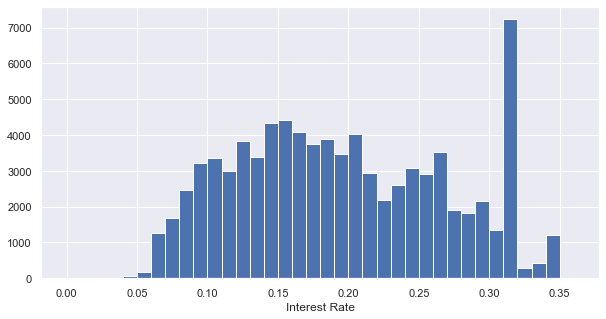

In [128]:
sb.set(style="darkgrid")
plt.figure(figsize=[10,5])
ax = plt.gca()
rate_bins = np.arange(0, loans.BorrowerRate.max() + 0.01, 0.01)
rate_ticks = np.arange(0, loans.BorrowerRate.max() + 0.1, 0.1)
rate_labels = ["{:2.0f}%".format(x*100) for x in rate_ticks]
plt.hist(data=loans, x='BorrowerRate', bins=rate_bins)
plt.xlabel('Interest Rate');
plt.show()

Distribution seems to align to a normal one.
Main curve peak is placed around 15%, but surprisingly there is another one even higher around 32%. This could represent a standard interest rate in loan products.

The next step is to visualize distribution of our main predictor variable 

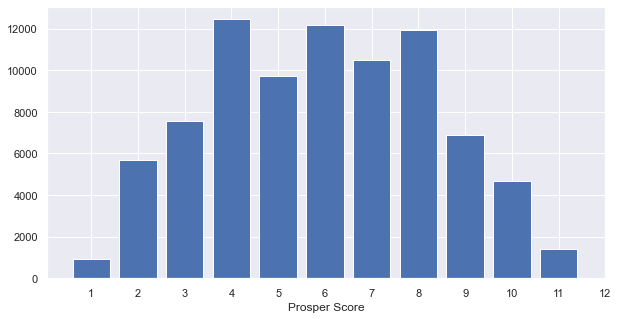

In [129]:
plt.figure(figsize=[10,5])
predictor_bins = np.arange(1, loans.ProsperScore.max() + 2, 1)
plt.hist(data=loans, x='ProsperScore', bins=predictor_bins, align='left', rwidth=0.8);
plt.xticks(predictor_bins, predictor_bins)
plt.xlabel('Prosper Score');

Prosper score is an estimation of how risky is a loan, going from 1 to 11, from riskiest to safest.
It shows a trimodal distribution with most common loans approved at the scores of 4, 6 and 7. Riskiest loans only represent 1.1% of total loans analyzed, while those safest 1.7%. 

Another interesting variable that deserves attention is the loan amount distribution

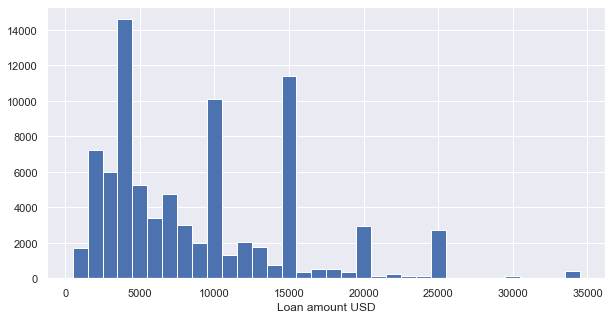

In [130]:
plt.figure(figsize=[10,5])
amount_bins = np.arange(1000, loans.LoanOriginalAmount.max() + 1000, 1000)
plt.hist(data=loans, x='LoanOriginalAmount', bins=amount_bins, align='left');
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(5000))
ax.xaxis.set_minor_locator(MultipleLocator(1000))
plt.xlabel('Loan amount USD');

Distribution is right skewed, concentrating most of the loans between first 10,000 US. Also, we can see there are common amounts, usually multiples of 5000 US (5000, 10000, 15000 and so on).

Along with Prosper rating, I have an initial hypothesis that income range and employment status have close relationship on interest rate. Let´s take a look at them as well.

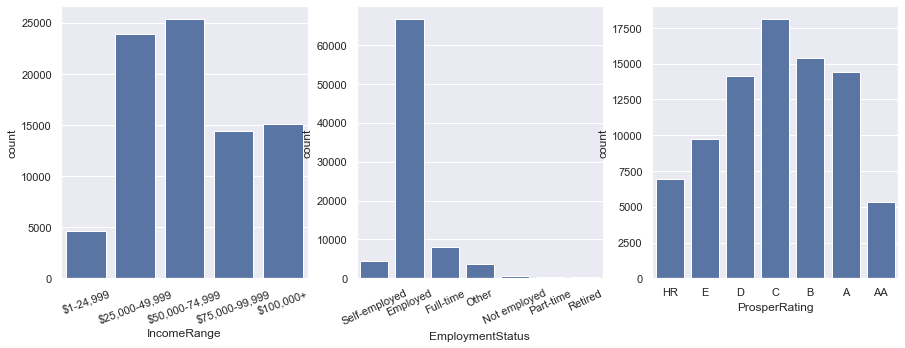

In [131]:
# Let´s dig into income range, employment status, prosper rating as our main independent vars 
plt.figure(figsize = [15, 5]) 
# Income Visualization
plt.subplot(1, 3, 1)
base_color = sb.color_palette()[0]
chart = sb.countplot(data=loans, x='IncomeRange', color=base_color)
chart.set_xticklabels(chart.get_xticklabels(), rotation=20);
# Employment status Visualization
plt.subplot(1, 3, 2)
chart = sb.countplot(data=loans, x='EmploymentStatus', color=base_color)
chart.set_xticklabels(chart.get_xticklabels(), rotation=25);
# Prosper Rating
plt.subplot(1, 3, 3)
sb.countplot(data=loans, x='ProsperRating', color=base_color);

We can see how people with income up to 24,999 strugle to get a loan. Also, there is a good demand on credit from more privileged people with incomes between 75,000+

As expected, employed people are likely to get a loan. In contrast, self-employed people (many of them could represent a micro business) does not seem to have easy access to loans.

While Prosper score relates to risky loans, prosper rating can be interpreted as the global qualification for a given loan. Both of them not necessarily match each other, indeed prosper rating has a more narrowed range. It shows a unimodal distribution with the center score 'C' as the mode.

There are other variables that might contribute to loan interests. Here is a quick look on them.

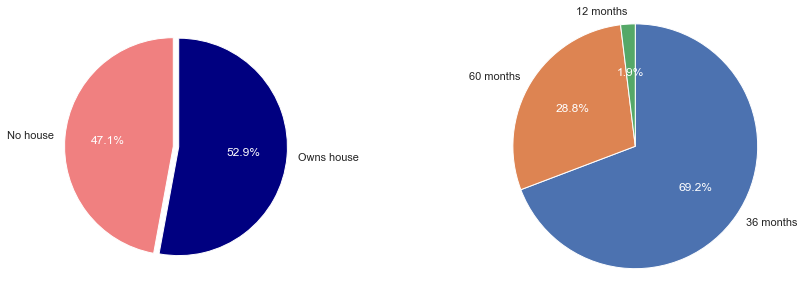

In [132]:
plt.figure(figsize = [15, 5]) 
# Owns a house
plt.subplot(1, 2, 1)

total = loans.shape[0]
with_house = loans[loans.IsBorrowerHomeowner == True].shape[0]
no_house = loans[loans.IsBorrowerHomeowner == False].shape[0]
with_house_p = with_house / total
no_house_p = no_house / total

colors = ['navy','lightcoral']
labels = ["Owns house", "No house"]

patches, texts, autotexts = plt.pie([with_house_p, no_house_p],
                                    labels=labels,
                                    autopct='%1.1f%%',
                                    explode=[0, 0.05],
                                    startangle=90,
                                    counterclock=False,
                                    colors=colors)
    
for text in autotexts:
    text.set_color('white')


# Term
plt.subplot(1, 2, 2)

one_year, three_years, five_years = loans[loans.Term == 12], loans[loans.Term == 36], loans[loans.Term == 60]
one_year_p = one_year.shape[0] / total
three_year_p = three_years.shape[0] / total
five_years_p = five_years.shape[0] / total
sorted_term = loans.Term.value_counts()


patches, texts, autotexts = plt.pie(sorted_term,
                                    labels=["{:1d} months".format(x) for x in sorted_term.index],
                                    autopct='%1.1f%%',
                                    explode=[0, 0, 0],
                                    startangle=90,
                                    counterclock=False)

for text in autotexts:
    text.set_color('white')

plt.axis('square');



People who owns a house is fair distributed with people who don´t.

Prosper score offers 3 terms for loan lifecycle. 3 years loans are by far the most popular.


_Bank card utilization_ is the percentage of available revolving credit that is utilized at the time the credit profile was pulled. 

Text(0.5, 0, 'Revolving credit utilized')

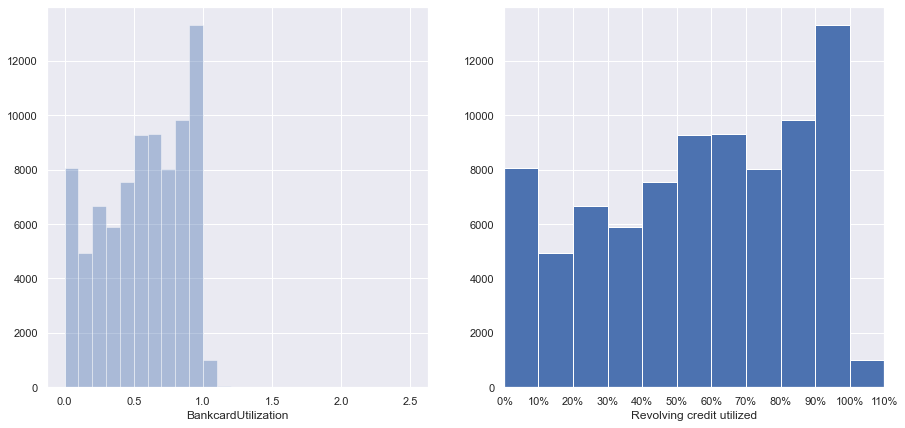

In [133]:
# Plot bank card utilization
plt.figure(figsize=[15,7])
plt.subplot(1, 2, 1)
loans.BankcardUtilization.describe()
utilization_bins = np.arange(0, loans.BankcardUtilization.max() + 0.1, 0.1)
chart = sb.distplot(loans.BankcardUtilization, bins=utilization_bins, kde=False)

# First plot seems to have some outliers, so let´s take a look closer where vast majority of points lie
plt.subplot(1, 2, 2)
plt.hist(loans.BankcardUtilization,bins= utilization_bins)
plt.xticks(utilization_bins, ["{:2.0f}%".format(x*100) for x in utilization_bins]);
plt.xlim((0, 1.1))
plt.xlabel("Revolving credit utilized")

Apparently , there are some outliers in this regard, people who has exceded their bank card utilization far beyond 100% percent. Normally, people has their revolvent credit utilized at their maximum credit line available. I think this factor might affect loan interest rate in some sense, or at least the prosper score given. Let´s see if those outliers are valid points:

In [134]:
loans.BankcardUtilization.describe()

count    83982.000000
mean         0.563972
std          0.301902
min          0.000000
25%          0.330000
50%          0.600000
75%          0.830000
max          2.500000
Name: BankcardUtilization, dtype: float64

In [135]:
bankcard_outliers = loans[loans.BankcardUtilization > 1.1]
"{:d} Loans that exceeded %110 credit card line at the moment loan was approved".format(bankcard_outliers.shape[0])

'77 Loans that exceeded %110 credit card line at the moment loan was approved'

In [136]:
# Let´s observe any potential wrong values on their vars
bankcard_outliers.sample(5)

,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,EstimatedReturn,ProsperRating,ProsperScore,EmploymentStatus,IsBorrowerHomeowner,FirstRecordedCreditLine,DelinquenciesLast7Years,BankcardUtilization,IncomeRange,TotalProsperLoans,LoanOriginalAmount
LoanKey,,,,,,,,,,,,,,,,
0038364851207507437AE49,2012-04-19 08:05:06.030,36,Chargedoff,0.22742,0.1902,0.1110,C,2,Employed,True,1993-09-16,0.0,1.12,"$75,000-99,999",1,15000
398D3627889282710428DC4,2011-08-04 18:05:55.960,36,Completed,0.30532,0.2699,0.1414,D,6,Employed,True,2006-08-23,0.0,1.12,"$50,000-74,999",0,3500
E7BD3581652760181F43991,2010-02-25 18:51:26.430,36,Chargedoff,0.36438,0.3400,-0.0345,HR,1,Full-time,True,1990-06-14,8.0,1.14,"$50,000-74,999",1,2000
1AE935800709720690FBEFE,2010-02-09 19:45:31.080,36,Chargedoff,0.33393,0.3100,0.0324,HR,2,Full-time,False,1995-12-19,26.0,2.50,"$25,000-49,999",1,2000
2033360933710371253752E,2011-01-18 10:23:10.367,36,Completed,0.30532,0.2699,0.1454,D,6,Employed,True,1991-09-01,1.0,1.11,"$50,000-74,999",0,2000


Text(0.5, 0, 'Loan amount')

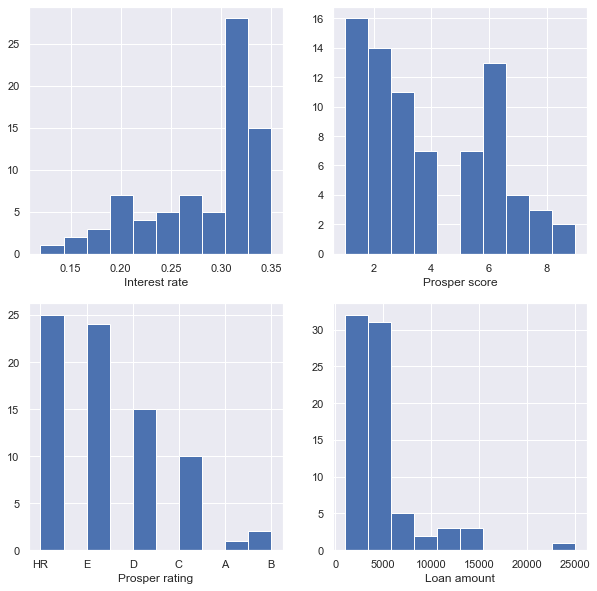

In [137]:
plt.figure(figsize=[10,10])
plt.subplot(2, 2, 1)
plt.hist(bankcard_outliers.BorrowerRate);
plt.xlabel("Interest rate")
plt.subplot(2, 2, 2)
plt.hist(bankcard_outliers.ProsperScore);
plt.xlabel("Prosper score")
plt.subplot(2, 2, 3)
plt.hist(bankcard_outliers.ProsperRating);
plt.xlabel("Prosper rating")
plt.subplot(2, 2, 4)
plt.hist(bankcard_outliers.LoanOriginalAmount);
plt.xlabel("Loan amount")

Well, we don´t see invalid data associated with overused bank credit cards loans. Of course, those loans tend to acquire high risk scores, smaller amounts (Mos of them around 5000 US) and with higher interest rate (around 30%). Looks like those are legitimate loans, so let´s keep them in our dataset.

A loan becomes delinquent when you make payments late (even by one day) or miss a regular installment payment or payments.
Finally, let´s see how _Delinquencies_ for borrowers get distributed

Text(0.5, 0, 'Delinquencies in 7 years')

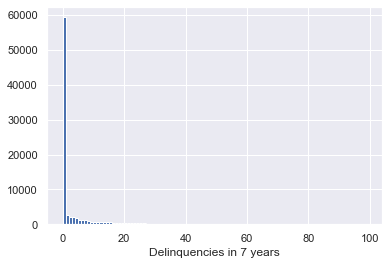

In [138]:
delinquencies_bins = np.arange(0, loans.DelinquenciesLast7Years.max() + 1, 1)
plt.hist(loans.DelinquenciesLast7Years, bins=delinquencies_bins);
plt.xlabel('Delinquencies in 7 years')

Wow! Distribution for delinquencies is way too much right skewed, so let´s apply transformations to better understand what is going on.

It is clear that vast mayority of borrowers usually pay their credits promptly. The interesting part of the chart comes with borrowers with delinquencies, so let´s apply some transformations on x axis.

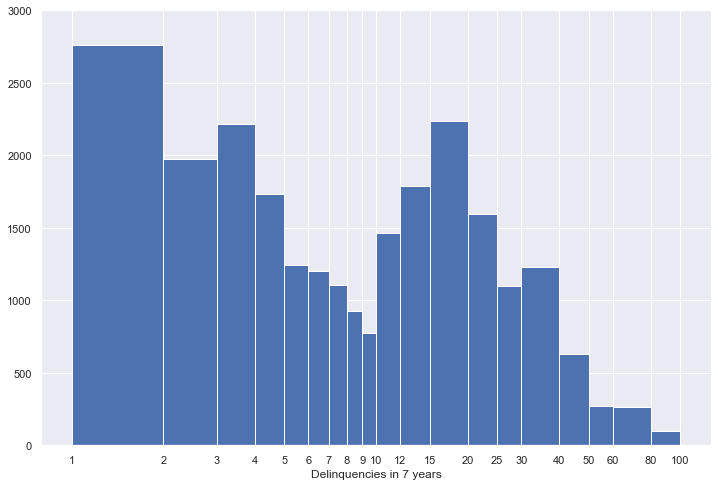

In [139]:
custom_bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 25, 30, 40, 50, 60, 80, 100]
plt.figure(figsize=[12, 8])
plt.xscale('log')
plt.hist(loans.DelinquenciesLast7Years, bins=custom_bins, align='mid');
plt.xlabel('Delinquencies in 7 years')
plt.xticks(custom_bins, custom_bins)
y_ticks = np.arange(0, 3500, 500)
plt.ylim((0, 3000))
plt.yticks(y_ticks, y_ticks);


Much better! This chart shows a extreme zoom in over people with delinquencies in their credits. Honestly it is a surprise to me how people with tens of delinquencies in their credit history can still access to loans.

<a id="univariate_section_conclusions"></a>
### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Interest rate presents a peculiar distribution with multiple spikes along its way. Most common interests are between 10% - 30% . There is an unusual high count for interest at 32%. This is definitely something to further investigate.
Regarding loan amounts, it is clearly a right skewed distribution, which means that small loan amounts are common , and high amounts are rare. Also, distribution presents multiple spikes, specially on 5000 US multiples. Population of loans with a average risk and proper rating are the most common.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Some data wranglin was necessary before starting research, mostly data type changes. Also removed unnecessary variables in dataset that are out of the scope of this investigation. 
For the study of registered delinquencies of borrowers in 7 years, using a linear scale simply did not work.
I had to use a log transformation to better visualize how delinquencies are distributed, being the most common values between 0 and 10 delinquencies by far.

<a id="bivariate_section"></a>
## Bivariate Exploration

I want to start this section by plotting a matrix of numeric variables that may affect interest rate. Let´s see if we can identify some interesting correlations

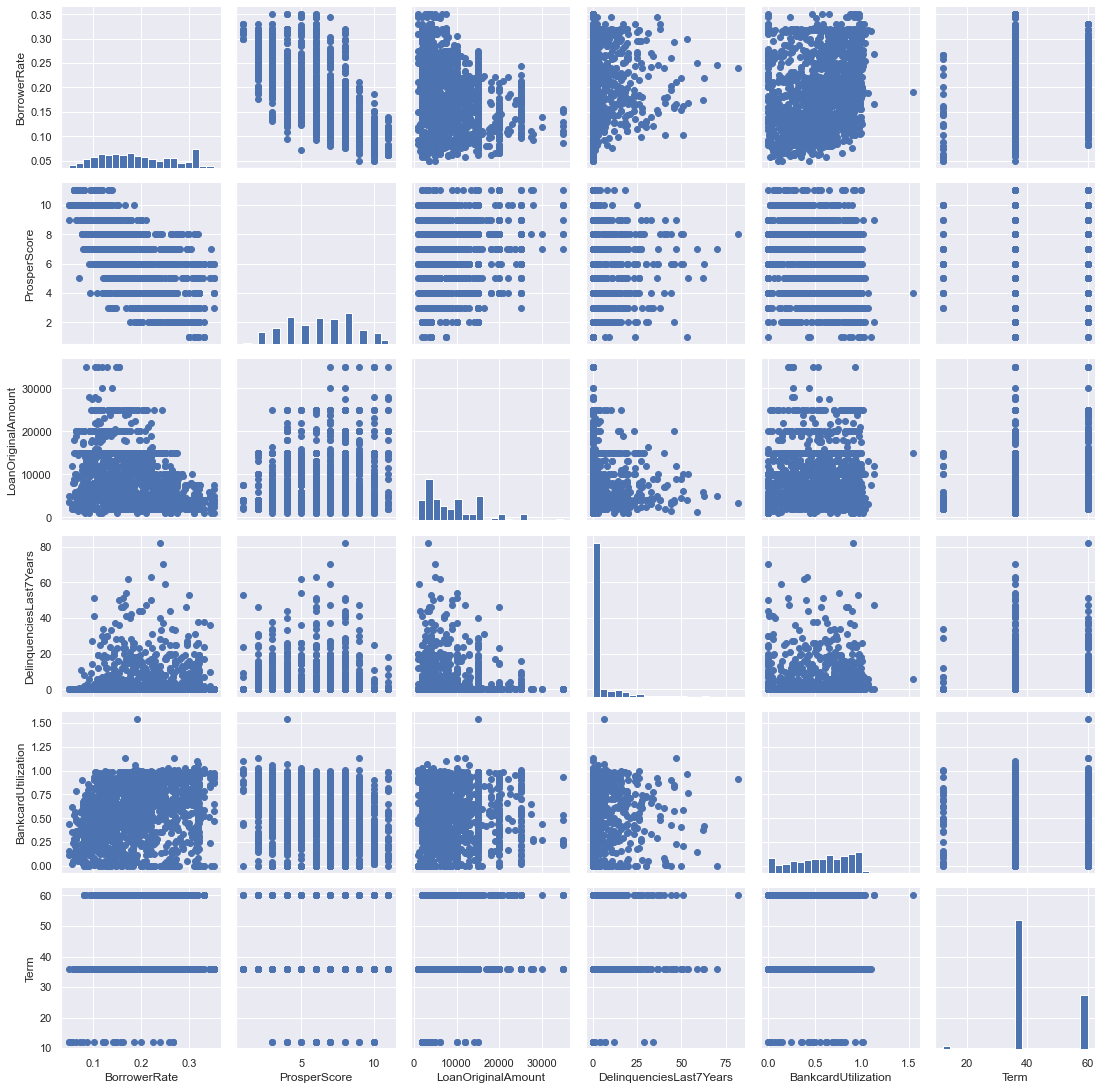

In [140]:
# Dataset has around 84,000 observations which means a performance issue at the time of plotting matrix. So let´s take
# a sample.
loans_sample =  loans.sample(1500, replace=False,random_state= 500)
numeric_vars = ['BorrowerRate', 'ProsperScore', 'LoanOriginalAmount', 'DelinquenciesLast7Years', 'BankcardUtilization', 'Term']
g = sb.PairGrid(data = loans_sample, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

- We don´t see a particular strong correlation between 2 variables
- Surprisingly seems not to be a strong relationship between delinquencies and assigned prosper score. Along all prosper score, we can see loans with different delinquencie numbers, however we can see a slighly negative correlation between delinquencies and loan amount.
- Interest rate seems to have a more evident correlation with prosper score and loan amount.
- Loan term and Bank card utilization claim to be irrelevant to the assigned interest rate.

As our main suspicious variables that may affect borrow rate/loan amount are categorical, let's create some box plots to see the big picture of it.


<Figure size 720x1080 with 0 Axes>

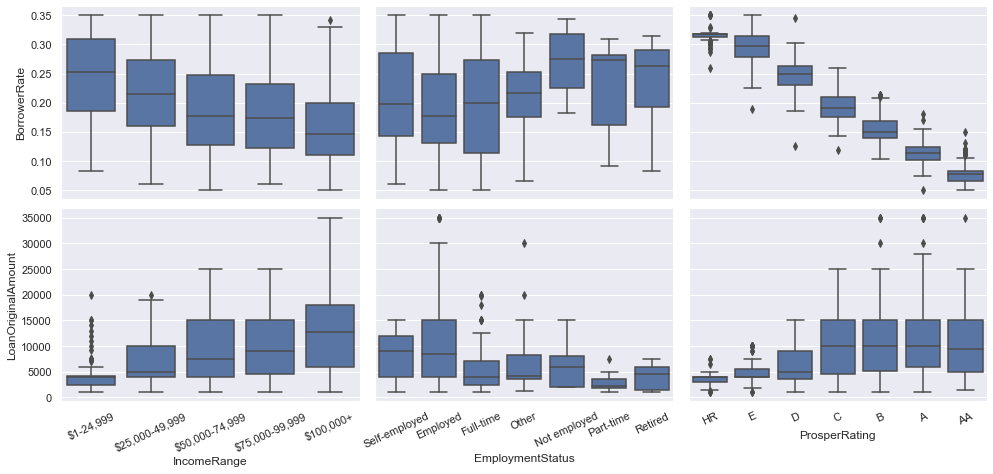

In [141]:
main_vars = ['IncomeRange', 'EmploymentStatus', 'ProsperRating']

def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    chart = sb.boxplot(x, y, color = default_color)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=25);

plt.figure(figsize = [10, 15])
g = sb.PairGrid(data = loans_sample, y_vars = ['BorrowerRate', 'LoanOriginalAmount'], x_vars = main_vars,
                height = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

- Just discovered that Income range has somehow influence on interest rate. In general, as income increases, loan rates tend to decrease according to the box plot distributions and taking the median as reference. However, there are some outlier cases with income 100,000+ with high interest rates. This suggests income range is just a factor but not a strong one to determine interest rate.
- Employment status relationship against interest rate is not so clear. At least we can see that the best average interest rate is gotten from "Employed" against "Self-employed" or "Part time". As one could expect, the average costly interst comes from "Non employed" people.
- Prosper rating reveals something really intersting! Clearly shows a tendency to drop down interest rates as long as rating gets better. Although there could be other factors that explain outliers above wiskers, prosper rating is the strongest factor found so far, even more than our original hypothesis about prosper score.


Regarding loan amounts, we can see that most loans are about 5,000 - 15,000 US and only people with 100,000+ income and/or ratings above C get access to amounts upper to 25,000 US.

Now let´s focus on our 2 main variables: Borrower rate vs Prosper score.
As this is a numeric continuos vs numeric discrete plot, I decided to use a heat map which usually depicts better high concentrated small spots with too many observations.

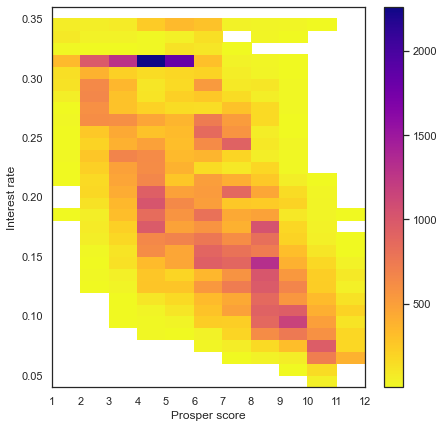

In [142]:
plt.figure(figsize=[7,7])
interest_bins = np.arange(0.04, loans.BorrowerRate.max() + 0.01, 0.01)
prosper_bins = np.arange(loans.ProsperScore.min(), loans.ProsperScore.max() + 2, 1)
sb.set_style('white')
plt.hist2d(x=loans['ProsperScore'], y=loans['BorrowerRate'], bins=[prosper_bins, interest_bins], cmap = 'plasma_r', cmin=5)
plt.xlabel('Prosper score')
plt.ylabel('Interest rate')
plt.xticks(prosper_bins, prosper_bins)
ax = plt.gca()
ax.yaxis.set_major_locator(MultipleLocator(0.05))
ax.yaxis.set_minor_locator(MultipleLocator(0.01))
plt.colorbar()
plt.show()

- We can observe a concentration of points in a inverted diagonal between prosper risk score and obtained interest rate, giving preferential interest rates of 10% or under to loans categorized as less risky.
- As we studied in Univariate section, there is a small amount of high risk loans, acording to the color encoding, in bright yellow chunks of less than 200 with diverse interest rates.
- Again, we observe an offbeat line that  contains a high concentrated group of loans with interest rate around 32%

Enought of prosper score analysis. What about interactions of interest rate vs loan amount?

Text(0, 0.5, 'Interest Rate')

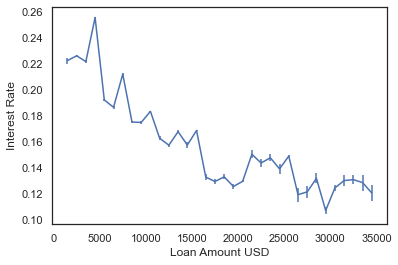

In [143]:
# set bin edges, compute centers

# Calculate centers for loan amount range scale
amount_step = 1000
amount_bins = np.arange(1000, loans.LoanOriginalAmount.max() + amount_step, amount_step)
amount_centers = (amount_bins + amount_step / 2)[:-1]

# Compute means for each
amount_intervals = pd.cut(loans.LoanOriginalAmount, amount_bins, right = False, include_lowest = True)
interest_means = loans['BorrowerRate'].groupby(amount_intervals).mean()
interest_sems = loans['BorrowerRate'].groupby(amount_intervals).sem()

plt.errorbar(x = amount_centers, y = interest_means, yerr = interest_sems)
plt.xlabel('Loan Amount USD')
plt.ylabel('Interest Rate')


I chose a line plot to better depict average trend among these variables.
As a general rule, interest rate tends to drop as loan amount increases. Also, please notice that standard deviation tends to grow with major loans, 20,000+ US, which suggests that major loans tend to be more negotiable taking into account other factors that affects interest rate. For small loan amounts, interest rates tend to be more predictable. This could suggest there are some interest rate standards around them.

<a id="bivariate_section_conclusions"></a>
### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Prosper rating is so far, the strongest factor found for interest rates. Charts also depict a relationship of other factors like loan amount, income range and employment status.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> We learnt from matrix plot that it can be percieved a slighly negative correlation between delinquencies and loan amounts. But as expected in my original hypothesis, except prosper rating, there isn´t clear relationships among other variables. Hopefully we´ll find more interesting relationships in the next section.

<a id="multivariate_section"></a>
## Multivariate Exploration

From the previous examination, we discovered variables that could direclty influence interest rate. Among those vars we have prosper risk score, prosper rating, income range and loan amount.

There are also secondary variables that did not influence directly but could do it combining them with one of the primary variables. Such variables are loan term, delinquencies, home ownership, bank credit utilization,  prior loans...

That is why I´d like to start this section with a general correlation map and then focus investigation on vars with decent correlation factor.

**NOTE: Correlation map works with numeric data only, so in order to use it I´ll need to apply some temporal type transformations on categorical data.**

In [144]:
# Feature Engineering --> Let´s create variable credit line history, which depicts total of months a borrower has own credit cards.
credit_time_delta = (loans['ListingCreationDate'] - loans['FirstRecordedCreditLine'])
loans['CreditHistory'] = credit_time_delta.apply(lambda time_delta: time_delta.days)
# Use numeric codes for categorical variables
loans['ProsperRatingCode'] = loans.ProsperRating.cat.codes
loans['IncomeRangeCode'] = loans.IncomeRange.cat.codes

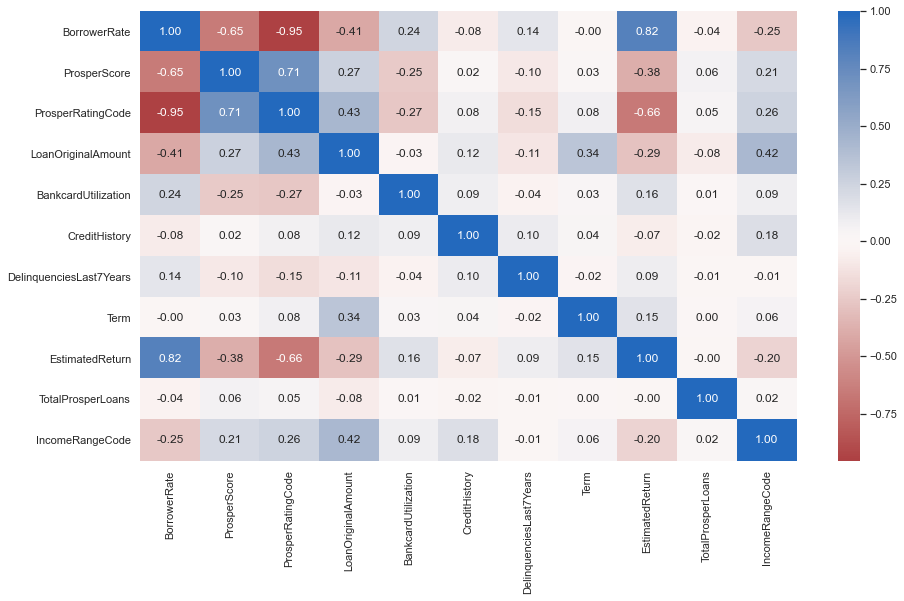

In [145]:
plt.figure(figsize=[14.70, 8.27])
adapted_df = loans[['BorrowerRate',
                    'ProsperScore',
                    'ProsperRatingCode',
                    'LoanOriginalAmount',
                    'BankcardUtilization',
                    'CreditHistory',
                    'DelinquenciesLast7Years',
                    'Term',
                    'EstimatedReturn',
                    'TotalProsperLoans',
                    'IncomeRangeCode']]
sb.heatmap(adapted_df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);
plt.yticks(rotation = 0);

This map defenitely gives us a big picture of what´s going on.

Map confirms what we already knew: Interest rate is mostly influenced by prosper rating then prosper risk score and to lesser extent loan amount, income range and bank card utilization.

So now the question is , _What factors do affect prosper ratings/scores then?_ 
Prosper rating seems to be influenced by prosper risk score, loan amount, and somehow income rate, bank card utilization. Be aware that delinquencies, credit card history or previous loans approved don´t really contribute to prosper rating.

Also, there is a concept we didn´t explore before: At the end, how much a lender gets from all of this? 
**Estimated return** is ultimately the goal every investor looks for. Estimated return is the difference between a previous calculated effective yield and estimated loss rate for charged-off loans. This variable correlates with both of our main variables: positve 0.82 correlation with Borrower interest and 0.66 negative correlation with prosper rating. This is variable we definitely want to investigate.

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

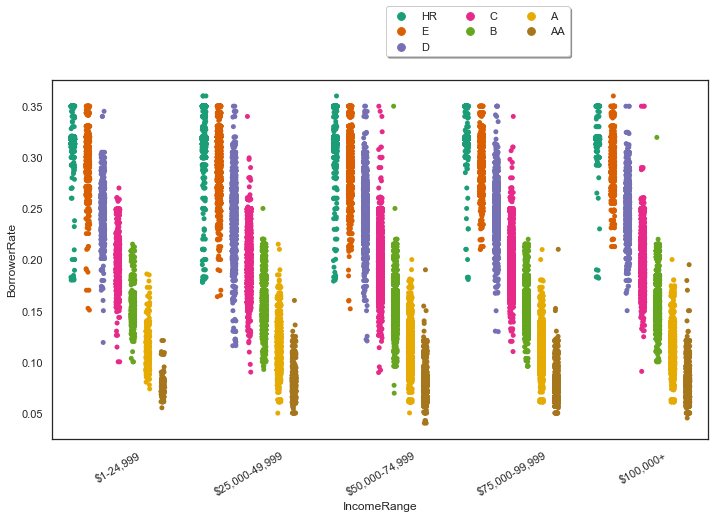

In [146]:
# interest - prosper rating - income range
plt.figure(figsize=[11.76, 6.62])
ax = sb.stripplot(data = loans, x = 'IncomeRange', y = 'BorrowerRate', hue = 'ProsperRating',
         jitter = True, dodge = True, palette = "Dark2")
ax.legend(loc='best', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.xticks(rotation=30)

People get progresively lower rates as their loans get better interest rate. One important callout here:
regardless income range, any people can access to a loan and get any rating. This desmitifies the fact that the more people earn the better borrowers they become. In general, as people earn more, we see slight tendency to get better score, but this is not a strong factor. Perhaps income range hits more on the loan amount, let´s explore that part.

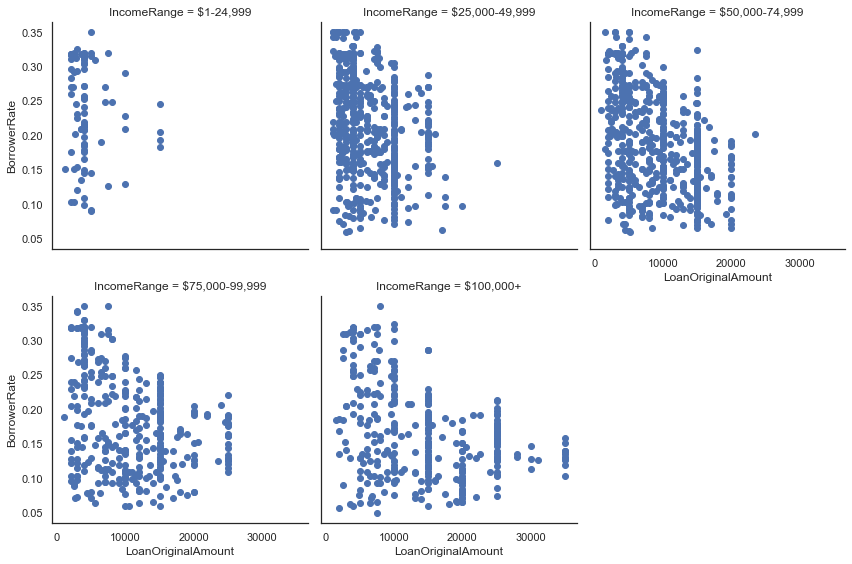

In [150]:
# interest rate, prosper rating, loan amount
loans_sample =  loans.sample(2000, replace=False,random_state= 750)
g = sb.FacetGrid(loans_sample, col= 'IncomeRange', height=4, col_wrap=3)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate');

Just used loan sample to avoid overplotting. 
We can confirm that income range is more determinant on loan amount than prosper score as we see how progressively more data points show up to the right of x axis as long as income increases.

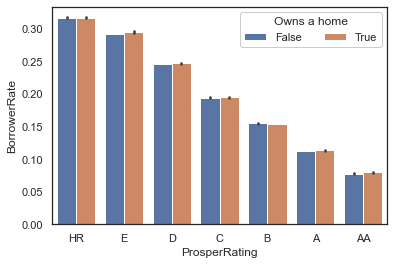

In [148]:
# Create a chart that relates PR interest, prosper rating and if borrwer owns a house
ax = sb.barplot(data = loans, x = 'ProsperRating', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner')
ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'Owns a home')

A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner. I was curious about to see if this fact somehow influences borrower rate, but as we can see, with a fair distributed population, it does not seem to have inference.

Finally let´s analyze if between prosper rating and estimated return we discover an interesting pattern.

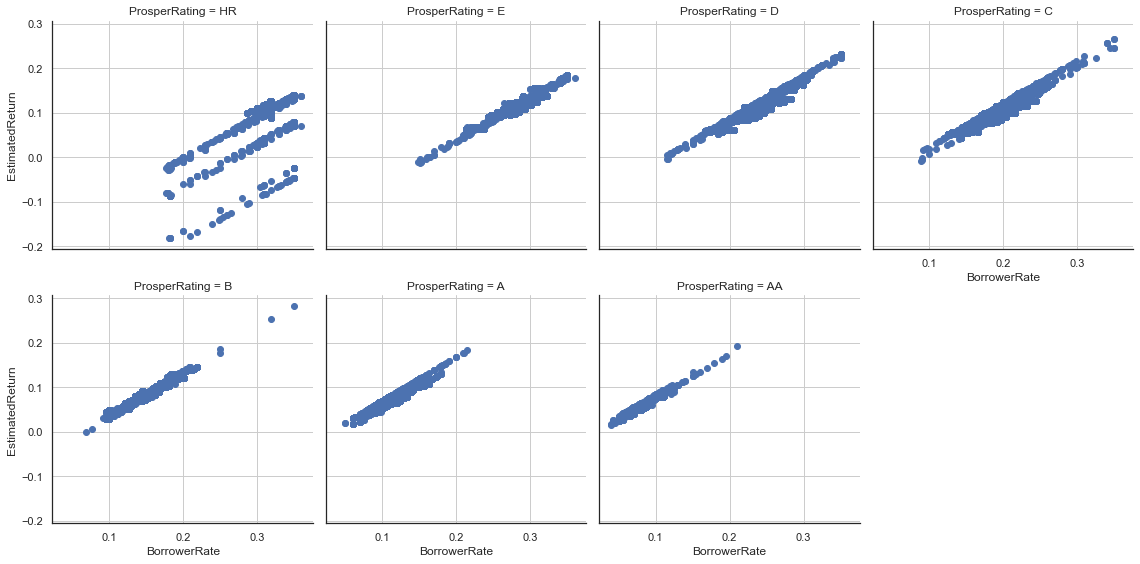

In [149]:
# interest rate, prosper rating, loan amount
g = sb.FacetGrid(loans, col= 'ProsperRating', size=4, col_wrap=4)
g.map(plt.scatter,'BorrowerRate', 'EstimatedReturn');
axes = g.axes
for ax in axes.flatten():
    ax.grid()

Definitely High risk loans are the most expensive for finance services as they can represent loss.
Estimation return increases a little bit as the rating goes up, giving sensation that loans with regular proper rating are the ones with major retribution to investors. Then for loans with higher rating like B, A and AA we see that overlall estimation return gets contracted a little bit.

<a id="multivariate_section_conclusions"></a> 
    
### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Prosper rating turned out to be a better predictable variable than prosper score. Both scores are clearly determinant to describer interst rate. My initial though was that other features like delinquencies, bank card history, bank card utilization or loan term could explain my feature of interest, but at the end they were weak enought to discard them.

### Were there any interesting or surprising interactions between features?

> It was interesting to reveal a negative correlation of estimated return and loan rating. Digging more on this showed that most of ranked loans are fair risky and are the ones which give slighly more benefit to investor.